In [1]:
from sklearn import svm
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from keras.utils import to_categorical
#loading the dataset
d = pd.read_csv(r'C:\Users\hp\Downloads\HAPT Data Set\assignment4data.csv')
#visualizing the datasets 
print(d.shape)
d.head(5)
d.describe()

Using TensorFlow backend.


(3000, 785)


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f776,f777,f778,f779,f780,f781,f782,f783,f784,label
count,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,...,3000.000000,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.029667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.417667
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.392875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.907468
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,75.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.000000


In [2]:
X=d.iloc[:,0:784]  # taking all the features
y = d.iloc[:,784]   #labels
print(X.shape)
print(y.shape)
scaler = StandardScaler()
X = scaler.fit_transform(X)
#splitting the dataset into train_set and test_set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
#reshaping labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train.shape)

(3000, 784)
(3000,)
(2250, 10)


In [3]:
# A helpful function we'll be using all over the place to plot training information:
def plot_training_history(history, model):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()
    
    loss, accuracy  = model.evaluate(X_test, y_test, verbose=False)
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

# Trying first with single hidden layer networks

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
model = Sequential()
# starting with very simple model
model.add(Dense(units=5, activation='sigmoid', input_shape=(784,)))  # single hidden layer with five neurons +input layer
model.add(Dense(units=10, activation='softmax'))                    # output layer
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 3925      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                60        
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


Train on 1800 samples, validate on 450 samples
Epoch 1/50
1800/1800 [==============================] - 3s 2ms/step - loss: 2.3663 - acc: 0.1222 - val_loss: 2.3859 - val_acc: 0.1089
Epoch 2/50
1800/1800 [==============================] - 0s 42us/step - loss: 2.3279 - acc: 0.1361 - val_loss: 2.3492 - val_acc: 0.1289
Epoch 3/50
1800/1800 [==============================] - 0s 33us/step - loss: 2.2927 - acc: 0.1506 - val_loss: 2.3143 - val_acc: 0.1400
Epoch 4/50
1800/1800 [==============================] - 0s 33us/step - loss: 2.2601 - acc: 0.1661 - val_loss: 2.2820 - val_acc: 0.1511
Epoch 5/50
1800/1800 [==============================] - 0s 33us/step - loss: 2.2302 - acc: 0.1889 - val_loss: 2.2535 - val_acc: 0.1756
Epoch 6/50
1800/1800 [==============================] - 0s 38us/step - loss: 2.2035 - acc: 0.2122 - val_loss: 2.2274 - val_acc: 0.2044
Epoch 7/50
1800/1800 [==============================] - 0s 33us/step - loss: 2.1790 - acc: 0.2389 - val_loss: 2.2030 - val_acc: 0.2422
Epoch 8/5

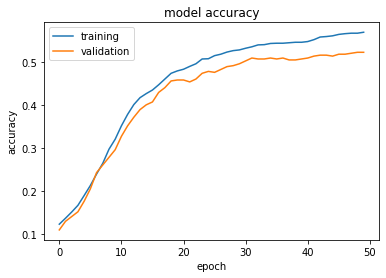

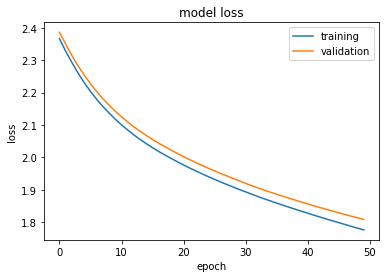

Test loss: 1.78
Test accuracy: 0.568


In [5]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128, epochs=50, verbose=True, validation_split=.2)
plot_training_history(history, model)

Train on 2025 samples, validate on 225 samples
Epoch 1/20
2025/2025 [==============================] - 1s 437us/step - loss: 2.3665 - acc: 0.1472 - val_loss: 2.2373 - val_acc: 0.2444
Epoch 2/20
2025/2025 [==============================] - 0s 70us/step - loss: 2.1551 - acc: 0.2973 - val_loss: 2.0827 - val_acc: 0.3778
Epoch 3/20
2025/2025 [==============================] - 0s 68us/step - loss: 2.0169 - acc: 0.4380 - val_loss: 1.9693 - val_acc: 0.5156
Epoch 4/20
2025/2025 [==============================] - 0s 111us/step - loss: 1.9067 - acc: 0.5175 - val_loss: 1.8703 - val_acc: 0.5778
Epoch 5/20
2025/2025 [==============================] - 0s 71us/step - loss: 1.8090 - acc: 0.5788 - val_loss: 1.7832 - val_acc: 0.6133
Epoch 6/20
2025/2025 [==============================] - 0s 64us/step - loss: 1.7199 - acc: 0.6232 - val_loss: 1.7014 - val_acc: 0.6533
Epoch 7/20
2025/2025 [==============================] - 0s 60us/step - loss: 1.6385 - acc: 0.6543 - val_loss: 1.6275 - val_acc: 0.6578
Epoch 

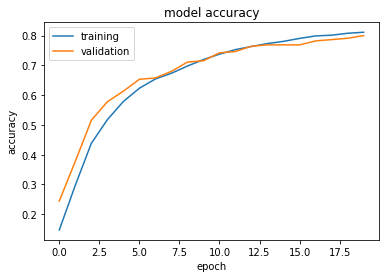

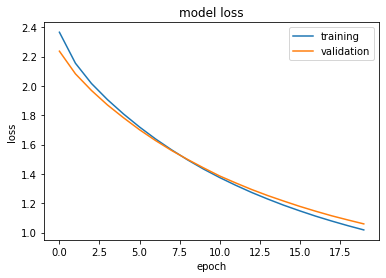

Test loss: 1.0
Test accuracy: 0.816


In [6]:
model_2 = Sequential()

model_2.add(Dense(units=256, activation='sigmoid', input_shape=(784,)))  # single hidden layer with 256 neurons
model_2.add(Dense(units=10, activation='softmax'))

model_2.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history_2 = model_2.fit(X_train, y_train, batch_size=128, epochs=20, verbose=True, validation_split=.1)
plot_training_history(history_2, model_2)

best accuracy we got is around 80% near 5-7 epoch after which model starts overfitting. Conlusion increasing the number of neurons in hidden layer increses accuracy... but starts overfitting

Train on 2025 samples, validate on 225 samples
Epoch 1/20
2025/2025 [==============================] - 7s 3ms/step - loss: 9.5448 - acc: 0.0864 - val_loss: 11.5168 - val_acc: 0.1022
Epoch 2/20
2025/2025 [==============================] - 4s 2ms/step - loss: 12.3207 - acc: 0.0904 - val_loss: 12.2789 - val_acc: 0.1022
Epoch 3/20
2025/2025 [==============================] - 3s 2ms/step - loss: 11.7439 - acc: 0.1249 - val_loss: 9.9697 - val_acc: 0.2356
Epoch 4/20
2025/2025 [==============================] - 4s 2ms/step - loss: 11.4090 - acc: 0.1348 - val_loss: 11.9979 - val_acc: 0.1244
Epoch 5/20
2025/2025 [==============================] - 4s 2ms/step - loss: 11.9492 - acc: 0.1111 - val_loss: 11.2108 - val_acc: 0.1200
Epoch 6/20
2025/2025 [==============================] - 3s 2ms/step - loss: 11.7092 - acc: 0.1215 - val_loss: 10.8195 - val_acc: 0.1200
Epoch 7/20
2025/2025 [==============================] - 4s 2ms/step - loss: 11.4661 - acc: 0.1427 - val_loss: 10.6893 - val_acc: 0.1511
Epo

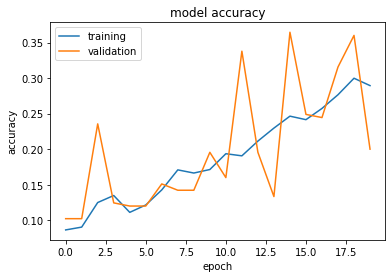

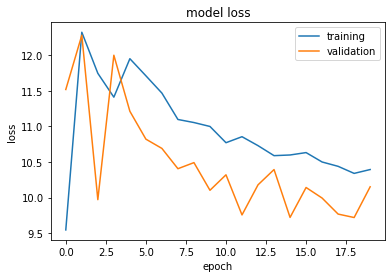

Test loss: 10.6
Test accuracy: 0.203


In [12]:
model_3 = Sequential()

model_3.add(Dense(units=20048, activation='sigmoid', input_shape=(784,)))  # with 2048 neurons
model_3.add(Dense(units=10, activation='softmax'))

model_3.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history_3 = model_3.fit(X_train, y_train, batch_size=128, epochs=20, verbose=True, validation_split=.1)
plot_training_history(history_3, model_3)

Increasing more neurons model did better..but it become sluggish as complexity of network increases.

This network took longer to train. It appears to be overfit as early as the second training epoch, and indeed when we run the test data it's worse than the training performance. Not only that, but it actually performs significantly WORSE than the simpler networks above. Five nodes performed about as well ten thousand nodes, but 256 nodes performed better than either of these

# Multilayer perceptrons

In [15]:
# 9000 total nodes in hidden layers
long_model = Sequential()
long_model.add(Dense(units=256, activation='sigmoid', input_shape=(784,)))
long_model.add(Dense(units=256, activation='sigmoid'))
long_model.add(Dense(units=256, activation='sigmoid'))
long_model.add(Dense(units=10, activation='softmax'))
long_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_44 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_45 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_46 (Dense)             (None, 10)                2570      
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________


Train on 2025 samples, validate on 225 samples
Epoch 1/10
2025/2025 [==============================] - 2s 1ms/step - loss: 2.3648 - acc: 0.1111 - val_loss: 2.3326 - val_acc: 0.0933
Epoch 2/10
2025/2025 [==============================] - 0s 130us/step - loss: 2.3052 - acc: 0.1072 - val_loss: 2.3098 - val_acc: 0.0933
Epoch 3/10
2025/2025 [==============================] - 0s 121us/step - loss: 2.2976 - acc: 0.1042 - val_loss: 2.3068 - val_acc: 0.0756
Epoch 4/10
2025/2025 [==============================] - 0s 129us/step - loss: 2.2965 - acc: 0.1047 - val_loss: 2.3050 - val_acc: 0.0800
Epoch 5/10
2025/2025 [==============================] - 0s 129us/step - loss: 2.2957 - acc: 0.1086 - val_loss: 2.3037 - val_acc: 0.0933
Epoch 6/10
2025/2025 [==============================] - 0s 118us/step - loss: 2.2949 - acc: 0.1141 - val_loss: 2.3039 - val_acc: 0.0889
Epoch 7/10
2025/2025 [==============================] - 0s 120us/step - loss: 2.2935 - acc: 0.1101 - val_loss: 2.3038 - val_acc: 0.0844
Epo

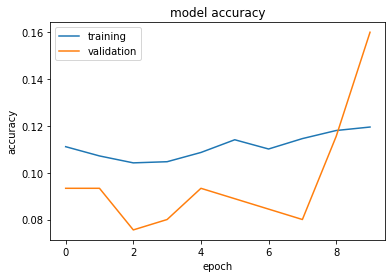

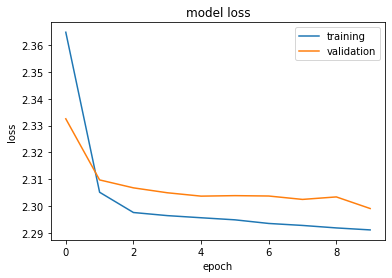

Test loss: 2.29
Test accuracy: 0.167


In [16]:
long_model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history_long = long_model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=True, validation_split=.1)
plot_training_history(history_long, long_model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 4,396,170
Trainable params: 4,396,170
Non-trainable params: 0
_________________________________________________________________


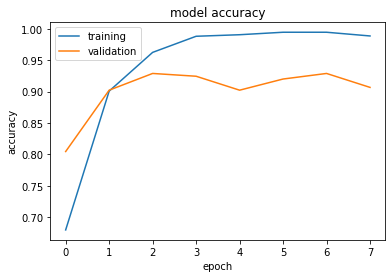

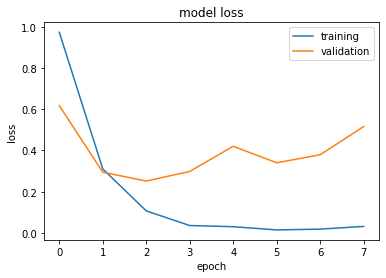

Test loss: 0.277
Test accuracy: 0.92


In [10]:
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
long_model_two = Sequential()
long_model_two.add(Dense(units=2048, activation='relu', input_shape=(784,)))
long_model_two.add(Dense(units=1024, activation='relu'))
#long_model.add(Dropout(rate=0.1))
long_model_two.add(Dense(units=512, activation='relu'))
long_model.add(Dropout(rate=0.2))
long_model_two.add(Dense(units=256, activation='relu'))
long_model.add(Dropout(rate=0.2))
long_model_two.add(Dense(units=128, activation='relu'))
long_model.add(Dropout(rate=0.25))
long_model_two.add(Dense(units=10, activation='softmax'))
long_model_two.summary()

long_model_two.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
# There are lots of parameters you can set here, including the amount that counts as a change
# what metric to watch, and more. See the documentation for more details. We'll keep it
# simple for now, and use the defaults for most of these. 
early_stopper = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = long_model_two.fit(X_train, y_train, batch_size=128, epochs=50, verbose=True, validation_split=.1,callbacks=[early_stopper])
plot_training_history(history, long_model_two)


dropout_rate: 0.8


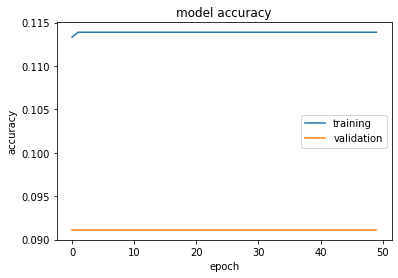

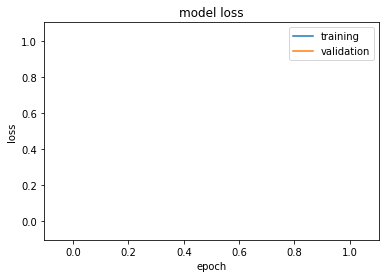

Test loss: 1.78
Test accuracy: 0.568

dropout_rate: 0.5


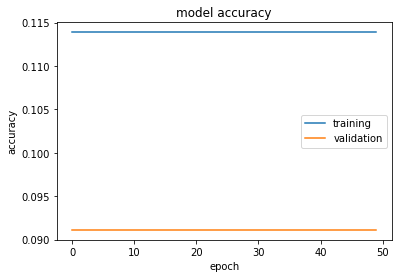

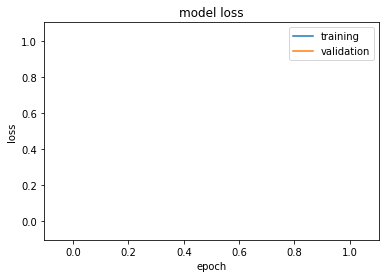

Test loss: 1.78
Test accuracy: 0.568

dropout_rate: 0.3


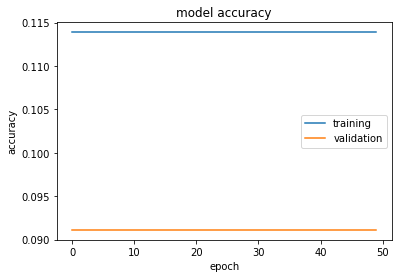

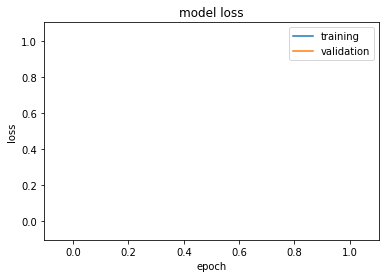

Test loss: 1.78
Test accuracy: 0.568

dropout_rate: 0.2


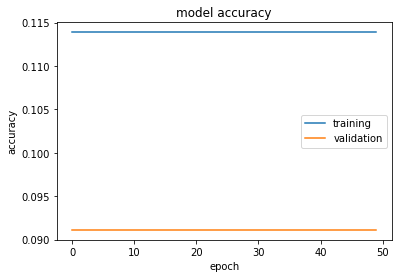

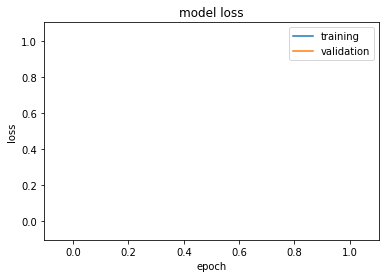

Test loss: 1.78
Test accuracy: 0.568

dropout_rate: 0.1


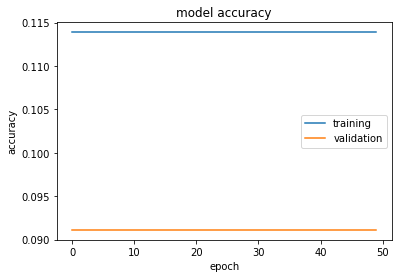

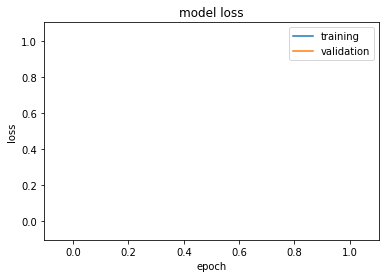

Test loss: 1.78
Test accuracy: 0.568


In [11]:
epochs = 50
batch_size = 32
validation_split = 0.2

dropout_rates = [.8, .5, .3, .2, .1]

for dropout_rate in dropout_rates:
    long_model_two = Sequential()
    long_model_two.add(Dense(units=512, activation='relu', input_shape=(784,)))
    #long_model.add(Dropout(rate=dropout_rate))
    long_model_two.add(Dense(units=256, activation='relu'))
    long_model.add(Dropout(rate=dropout_rate))
    long_model_two.add(Dense(units=128, activation='relu'))
    long_model.add(Dropout(rate=dropout_rate))
    long_model_two.add(Dense(units=10, activation='softmax'))
    long_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = long_model.fit(X_train,y_train, batch_size=batch_size, epochs=epochs, verbose=False, validation_split=validation_split)
    print(f'\ndropout_rate: {dropout_rate}')
    plot_training_history(history, model)